In [22]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [24]:
print(api_key)

54f6f5bb1a7c4610462289caa0693a66


In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create an empty list to store JSON responses
response_json = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [26]:
# Build query URL
queryUrl = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + api_key + "&q="

In [27]:
# cities = pd.DataFrame(cities)
# cities = cities.rename(columns={0: "cities"})
# cities
for x in cities.index:
    city_name = str(cities["cities"][x])
#     city_query = queryUrl + str(city_name)
#     weather_response = requests.get(city_query)
#     response_json.append(weather_response.json())
    print(f'Processing Record {x} | {city_name}')
    

TypeError: 'builtin_function_or_method' object is not iterable

In [28]:
print("Retrieving Data")
print("------")
# Make a request for each of the indices
for x in range(len(cities)):
    print(f"Processing Record: {x} for ID: {cities[x]}")

    # Get one of the posts
    post_response = requests.get(url + str(cities[x]))

    # Save post's JSON
    response_json.append(post_response.json())

Retrieving Data
------
Processing Record: 0 for ID: punta arenas


NameError: name 'url' is not defined

In [29]:
# Build query URL
queryUrl = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + api_key + "&q="

In [30]:
# creating dataframe wtih test_cities
test_cities = ['acapulco', 'jamestown', 'dali', 'malatya', 'manila', 'pevek', 'cidreira']
responses = []
city_name = []
latitude = []
temperature = []
humidity = []
clouds = []
wind = []


for city in cities:
    weather_data = requests.get(queryUrl + city).json()
    responses.append(weather_data)
    try:
        city_name.append(weather_data['name'])
        latitude.append(weather_data['coord']['lat'])
        temperature.append(weather_data['main']['temp'])
        humidity.append(weather_data['main']['humidity'])
        clouds.append(weather_data['clouds']['all'])
        wind.append(weather_data['wind']['speed'])
        print(f'{city} found')
    except:
        print(f'**{city} not found**')
        pass

punta arenas found
hami found
leningradskiy found
ushuaia found
albany found
kodiak found
falakata found
barrow found
busselton found
hithadhoo found
pokhara found
**taolanaro not found**
hobart found
**mys shmidta not found**
akdepe found
**tsihombe not found**
sao filipe found
oksfjord found
sao joao da barra found
saint-georges found
rikitea found
georgetown found
hilo found
aksu found
victoria found
buala found
qaanaaq found
kaitangata found
qaqortoq found
tasiilaq found
**illoqqortoormiut not found**
**amderma not found**
kantang found
sindou found
longyearbyen found
**barentsburg not found**
vaini found
margate found
liverpool found
mataura found
hermanus found
upernavik found
marechal candido rondon found
zhigansk found
geraldton found
bluff found
kavieng found
jamestown found
cape town found
coihaique found
hunchun found
plymouth found
birjand found
mahebourg found
verkhnyaya inta found
cortez found
callaway found
batemans bay found
yellowknife found
butaritari found
dalby foun

aguimes found
martyush found
poum found
formiga found
oriximina found
abha found
methoni found
borger found
kulim found
kloulklubed found
walvis bay found
camacha found
caceres found
manaure found
vila velha found
cayenne found
hellvik found
chumikan found
pizarro found
makakilo city found
thinadhoo found
komsomolskiy found
bilgoraj found
igrim found
westport found
kulhudhuffushi found
mitu found
tatarsk found
candido mendes found
dulce nombre de culmi found
podporozhye found
gigmoto found
risor found
apricena found
xianyang found
terrasini found
groningen found
iberia found
bandar-e lengeh found
colares found
**otradinskiy not found**
vershino-darasunskiy found
lakes entrance found
coahuayana found
neiafu found
marsh harbour found
belmonte found
**labutta not found**
wuwei found
mecca found
necochea found
chernyshevskiy found
chunoyar found
amazar found
sukhobuzimskoye found
mehran found
inuvik found
muroto found
jaciara found
byron bay found
ambovombe found
pahrump found
yuriria foun

In [31]:
#print(responses)

In [32]:
weather_df = pd.DataFrame({
    'City': city_name,
    'Latitude': latitude,
    'Temperature': temperature,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind (MPH)': wind
})

weather_df

,City,Latitude,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Punta Arenas,-53.1500,281.04,57,0,4.12
1,Kumul,42.8000,284.60,39,7,2.05
2,Leningradskiy,69.3833,252.68,94,99,1.35
3,Ushuaia,-54.8000,281.15,61,20,2.57
4,Albany,42.6001,288.47,21,20,9.77
...,...,...,...,...,...,...
546,Labuan,5.2767,298.15,94,20,3.45
547,Fereydūnkenār,36.6864,287.15,58,0,2.06
548,Nsunga,-1.1439,294.15,88,75,1.17
549,Bintulu,3.1667,297.10,94,40,2.06


In [33]:
# function to convert 'Temperature' column from Kelvin to Farenheit
def Kelvin_to_Farenheit(kelvin):
    farenheit = (kelvin-273.15)*(9/5)+32
    return farenheit

In [34]:
weather_df['Temperature'] = Kelvin_to_Farenheit(weather_df['Temperature'])
weather_df

,City,Latitude,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Punta Arenas,-53.1500,46.202,57,0,4.12
1,Kumul,42.8000,52.610,39,7,2.05
2,Leningradskiy,69.3833,-4.846,94,99,1.35
3,Ushuaia,-54.8000,46.400,61,20,2.57
4,Albany,42.6001,59.576,21,20,9.77
...,...,...,...,...,...,...
546,Labuan,5.2767,77.000,94,20,3.45
547,Fereydūnkenār,36.6864,57.200,58,0,2.06
548,Nsunga,-1.1439,69.800,88,75,1.17
549,Bintulu,3.1667,75.110,94,40,2.06


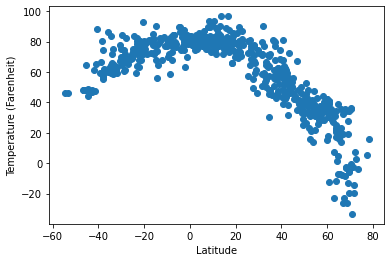

In [36]:
# Scatter Plot - Temperature (Farenheit) v. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Temperature']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
plt.show()

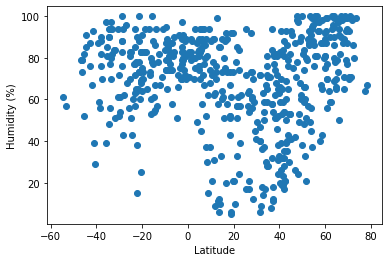

In [38]:
# Scatter Plot - Humidity (%) v. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

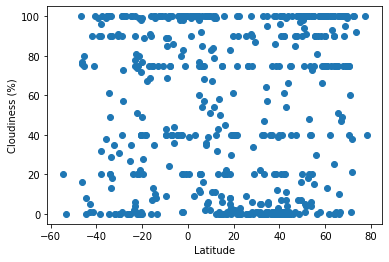

In [39]:
# Scatter Plot - Cloudiness (%) v. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

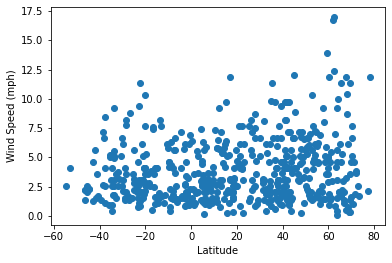

In [40]:
# Scatter Plot - Wind Speed (mph)) v. Latitude
x_values = weather_df['Latitude']
y_values = weather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.show()